# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}
from utils.KMeans import KMeans
from utils.IsotropicGM import IsotropicGM
from utils.GaussianMixtureModel import GaussianMixtureModel, FIGSIZE, MARKER, MARKER_COLOR, CMAP, MARKER_SIZE

#### Load datasets 

In [2]:
train = pd.read_table("data/EMGaussian.data", sep=" ", header=None)
test = pd.read_table("data/EMGaussian.test", sep=" ", header=None)

print "Traning set : ", train.shape
print "Testing set : ", test.shape

train = train.values
test = test.values


Traning set :  (500, 2)
Testing set :  (500, 2)


__Visualization__

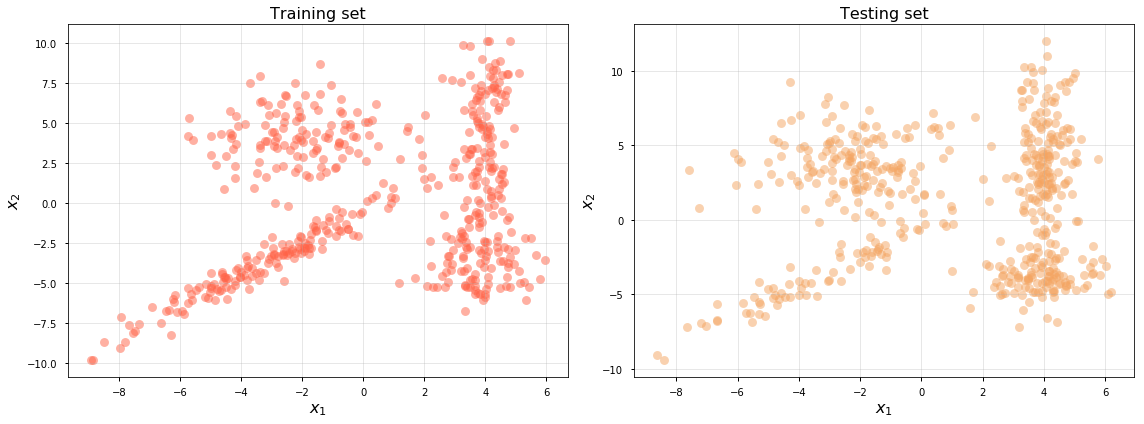

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(*train.T, color="tomato", **plot_kwds)
ax[0].grid(alpha=0.3)
ax[0].set_xlabel(r"$x_{1}$", size=16)
ax[0].set_ylabel(r"$x_{2}$", size=16)
ax[0].set_title("Training set", size=16)


ax[1].scatter(*test.T, color = "sandybrown", **plot_kwds)
ax[1].grid(alpha=0.3)
ax[1].set_xlabel(r"$x_{1}$", size=16)
ax[1].set_ylabel(r"$x_{2}$", size=16)
ax[1].set_title("Testing set", size=16)

plt.tight_layout()

## KMeans







$$\text{Distorsion function :  }\enspace J(\mu, z) = \sum_{i=1}^{n}\sum_{k=1}^{K}\mathbb{1}_{\{x_{i}\in C_{k}\}}\|x_{i}-\mu_{k}\|^{2}$$

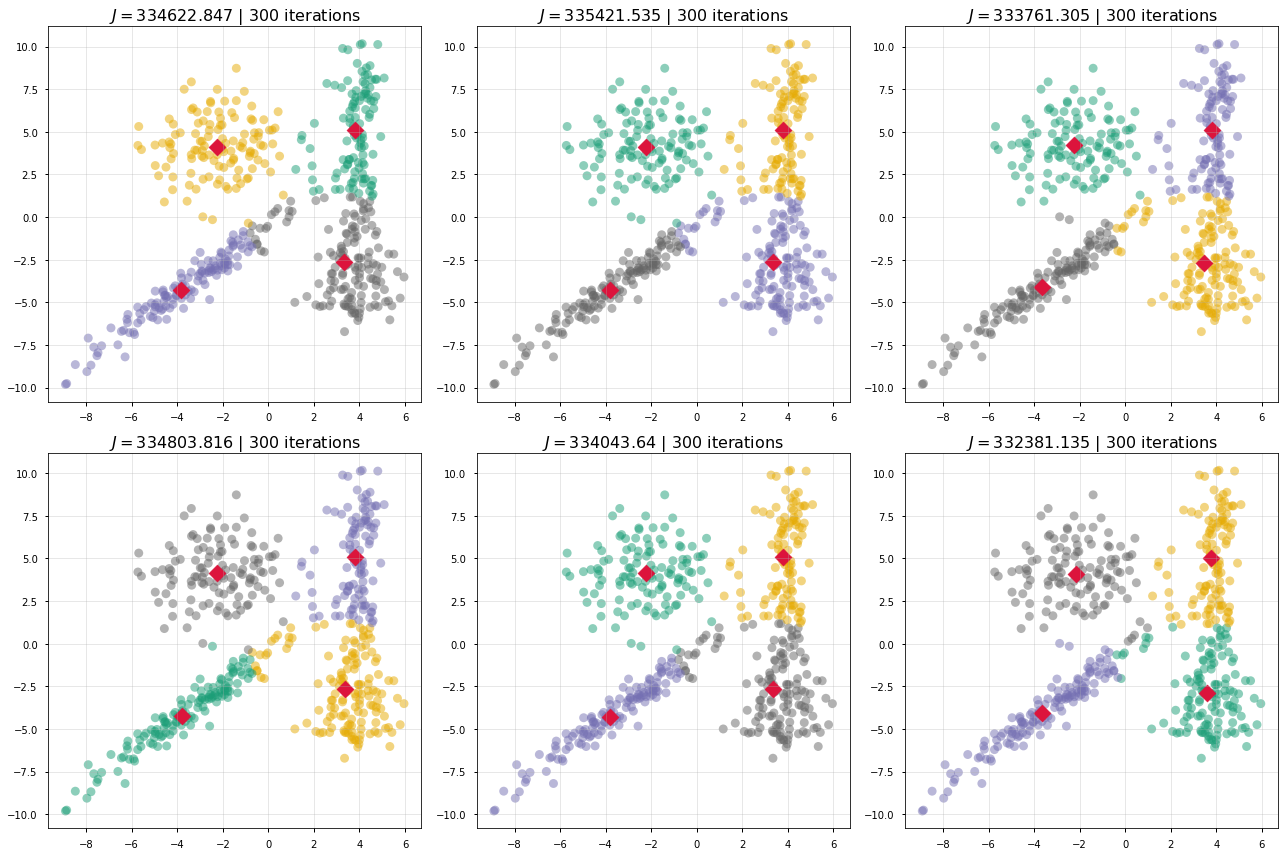

In [17]:
n_row = 2
n_col = 3
seed = [1, 3, 7, 13, 17, 37]

fig, ax = plt.subplots(n_row, n_col, figsize = (18, 12))

result_list = []
for i in range(n_row):
    for j in range(n_col):
        np.random.seed(seed[n_col*i+j])
        kmeans = KMeans(nr_clusters=4, n_init=1)
        kmeans.fit(train)
        ax[i][j].scatter(*train.T, c=kmeans.labels_, cmap=CMAP, **plot_kwds)
        ax[i][j].scatter(*kmeans.centroids_.T, marker=MARKER, s=MARKER_SIZE, color=MARKER_COLOR)
        distortion = str(round(kmeans.distorsion_,3))
        nr_iterations = str(kmeans.n_iter_)
        centroid_list = kmeans.centroids_.tolist()
        centroid_list.sort()
        result_list.append((centroid_list,distortion))
        ax[i][j].set_title(r"$J = $" + distortion + " | " + nr_iterations + " iterations", size=16)
        ax[i][j].grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("docs/img/kmeans.png")

In [71]:
#result_list

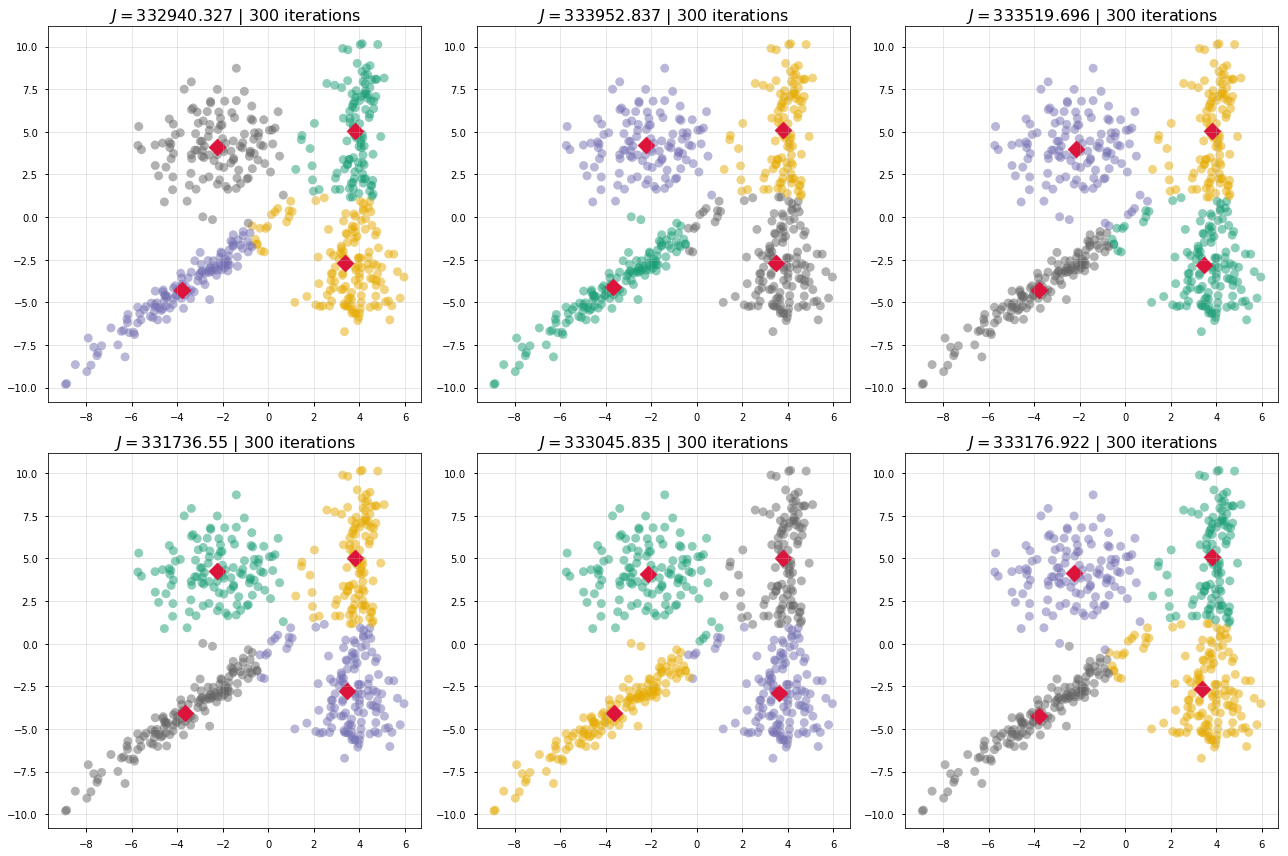

In [70]:
# K-means++
n_row = 2
n_col = 3
seed = [1, 3, 7, 13, 17, 37]

fig, ax = plt.subplots(n_row, n_col, figsize = (18, 12))

result_list_k = []
for i in range(n_row):
    for j in range(n_col):
        np.random.seed(seed[n_col*i+j])
        kmeans = KMeans(nr_clusters=4, n_init=1,init='k-means++')
        kmeans.fit(train)
        ax[i][j].scatter(*train.T, c=kmeans.labels_, cmap=CMAP, **plot_kwds)
        ax[i][j].scatter(*kmeans.centroids_.T, marker=MARKER, s=MARKER_SIZE, color=MARKER_COLOR)
        distortion = str(round(kmeans.distorsion_,3))
        nr_iterations = str(kmeans.n_iter_)
        centroid_list = kmeans.centroids_.tolist()
        centroid_list.sort()
        result_list_k.append((centroid_list,distortion))
        ax[i][j].set_title(r"$J = $" + distortion + " | " + nr_iterations + " iterations", size=16)
        ax[i][j].grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("docs/img/kmeans.png")

In [72]:
result_list_k

[([[-3.795205781249999, -4.248162187499998],
   [-2.240347525, 4.127447716666667],
   [3.360431425531915, -2.7108218865248226],
   [3.800074774774777, 5.033873873873873]],
  '332940.327'),
 ([[-3.6611894814814807, -4.068399140740739],
   [-2.2447251538461535, 4.237431794871796],
   [3.4776144676258998, -2.697063712230216],
   [3.8028082568807355, 5.104672477064219]],
  '333952.837'),
 ([[-3.795205781249999, -4.248162187499998],
   [-2.1418000239999997, 3.973384288],
   [3.4757656691176475, -2.8206264411764703],
   [3.800074774774777, 5.033873873873873]],
  '333519.696'),
 ([[-3.6611894814814807, -4.068399140740739],
   [-2.2447251538461535, 4.237431794871796],
   [3.475081832116789, -2.753595299270073],
   [3.800074774774777, 5.033873873873873]],
  '331736.55'),
 ([[-3.6366213970588226, -4.05302194117647],
   [-2.155464900826446, 4.112993884297521],
   [3.6040187099236647, -2.8877266870229006],
   [3.788092857142859, 4.99905357142857]],
  '333045.835'),
 ([[-3.78479953488372, -4.216397

## Gaussian Mixture Model

_Hypothesis : _ 

$$\forall i\in[\![1,n]\!]\; Z_{i}\sim\mathcal{M}(k,\pi)\text{  and  }\forall j\in[\![1,k]\!]\; X_{i}\mid\{Z_{i}=j\}\sim\mathcal{N}(\mu_{j},\Sigma_{j})\enspace\text{with }\; \mu_{j}\in\mathbb{R}^{d},\, \Sigma_{j}\in\mathcal{S}_{d}^{++}(\mathbb{R})$$

---


 Let $\theta$ denote our set of parameters and $N$ the matrix given by :

$$
N_{ij} = p_{\theta}(X_{i}=x_{i}\mid Z_{i}=j) = \mathcal{N}\left(x_{i}\mid \mu_{j}, \Sigma_{j}\right)
$$

Let the responsability matrix $\tau$ be

$$\tau_{ij} = p_{\theta}(Z_{i}=j\mid X_{i})$$

Then, $\forall i,j$, $\tau{ij}$ is given by : $$\tau_{ij} = \frac{\pi_{j}N_{ij}}{\pi^{T}N_{i,\cdot}}$$

__(E) Step__:

If $\ell$ is our log-likelihood, the Expectation step boils down to the computation of the following expectation w.r.t the law of $Z\mid \{X=x\}$ : 

$$\mathbb{E}_{Z\mid X=x}[\ell(\theta)] = \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log N_{ij} + \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log\pi_{j}$$

__(M) Step__:

We compute the MLE for each parameter, namely $\forall j\in[\![1,k]\!]$

$$
\hat{\pi}_{j} = \frac{1}{n}\sum_{i}\tau_{ij}
$$
$$
\hat{\mu}_{j} = \frac{\sum_{i}\tau_{ij}x_{i}}{\sum_{i}\tau_{ij}}
$$

$$
\hat{\Sigma}_{j} = \frac{\sum_{i}\tau_{ij}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i}\tau_{ij}}
$$

which can be read as the observations, weighted by their probabilty to belong to a given class

### Isotropic Gaussian Mixtures

Under the assumption that $\forall j\in[\![1,k]\!],\, \exists\nu_{j}\in\mathbb{R}\,/\;\Sigma_{j}=\nu_{j}I_{d}$, the extensive formulation of the expectation step becomes :

$$\mathbb{E}_{Z\mid X=x}[\ell(\theta)] = \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log\pi_{j} + \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\left[\frac{d}{2}\log 2\pi + \frac{d}{2}\log\nu_{j}+\frac{1}{2\nu_{j}}\|x_{i}-\mu_{j}\|^{2}\right]$$

Hence, while $\hat{\pi}_{j}$ and $\hat{\mu}_{j}$ are not affected by this development, we get :

$$
\hat{\nu}_{j} = \frac{\sum_{i}\tau_{ij}\frac{\|x_{i}-\hat{\mu}_{j}\|^{2}}{d}}{\sum_{i}\tau_{ij}}
$$

## Plots

> ### Isotropic GM

In [ ]:
iso_gmm = IsotropicGM(k=4, initialization="kmeans")
iso_gmm.fit(train)

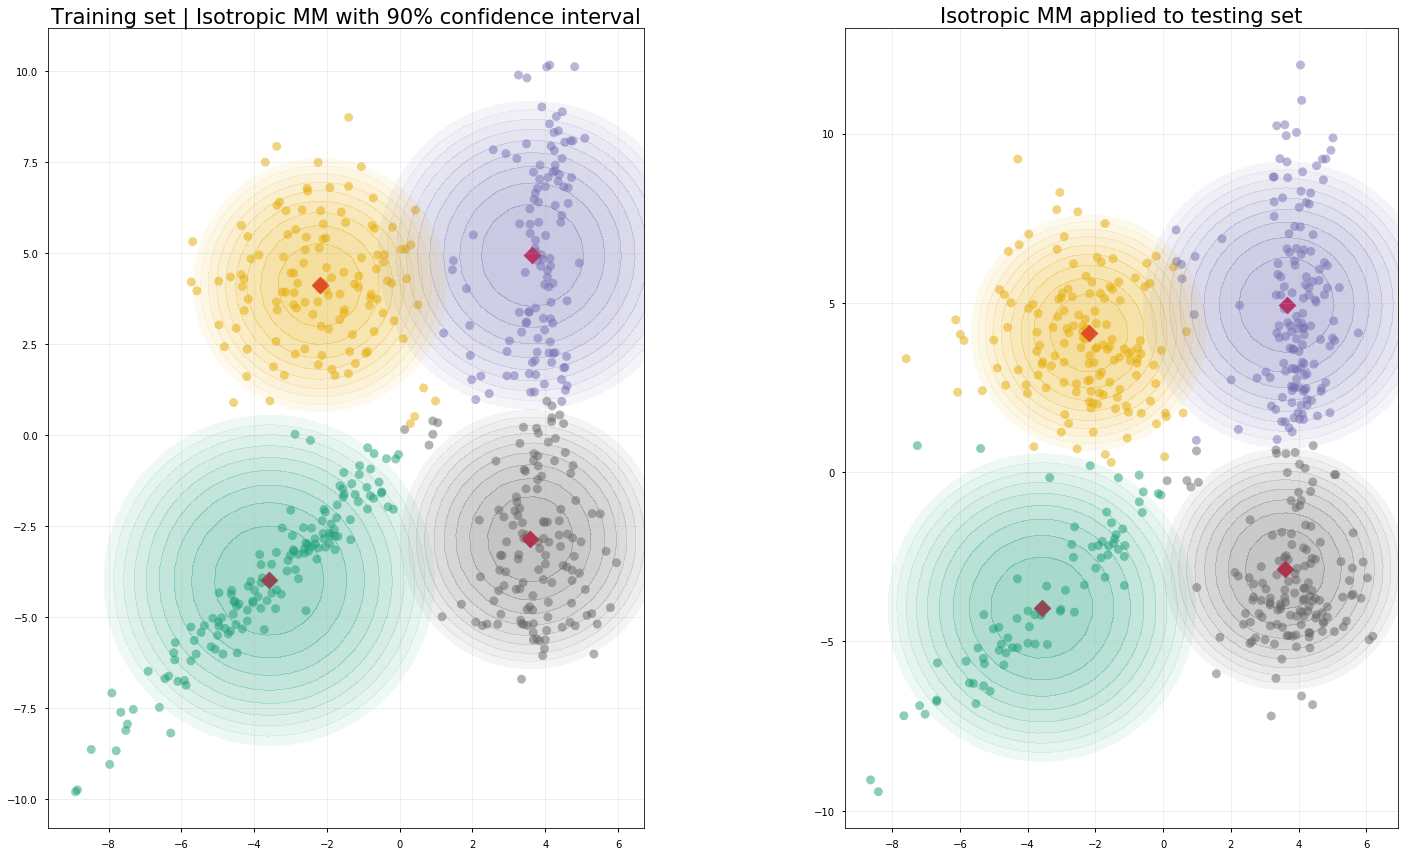

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | Isotropic MM with 90% confidence interval"
iso_gmm.plot_pred(X=train,
                 labels=iso_gmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0])
ax[0].set_aspect('equal')

test_labels = iso_gmm.predict(test)
title = "Isotropic MM applied to testing set"
iso_gmm.plot_pred(X=test,
                 labels=test_labels, 
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()
# plt.savefig("docs/img/3_b_isotropic_gm.png")

> ### General Gaussian Mixture

In [9]:
gmm = GaussianMixtureModel(k=4, initialization="kmeans")
gmm.fit(train)

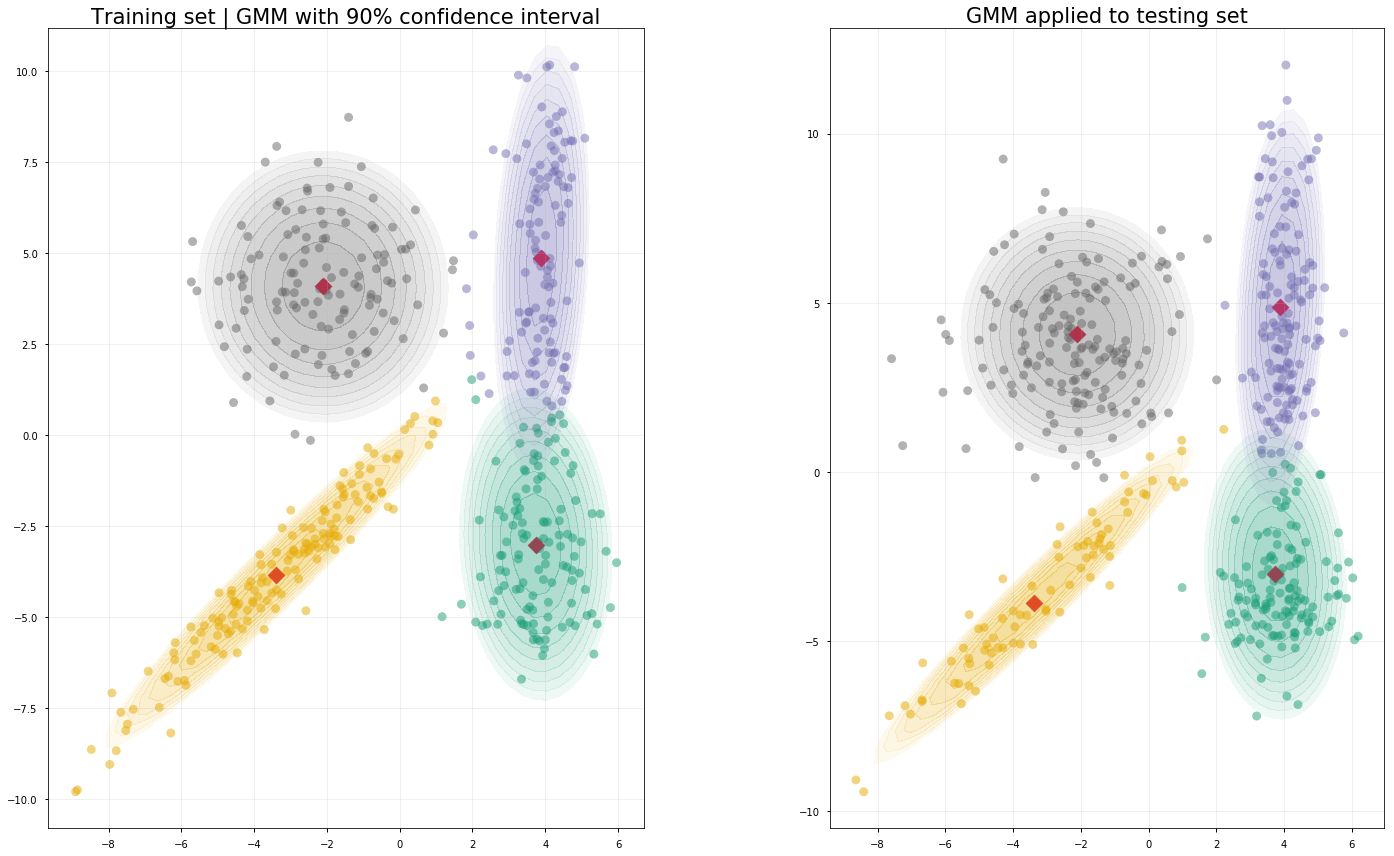

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | GMM with 90% confidence interval"
gmm.plot_pred(X=train,
             labels=gmm.labels_,
             title=title,
             plot_kwds=plot_kwds,
             ax=ax[0])
ax[0].set_aspect('equal')

test_labels = gmm.predict(test)
title = "GMM applied to testing set"
gmm.plot_pred(X=test,
             labels=test_labels, 
             title=title,
             plot_kwds=plot_kwds,
             ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()